# DIS08 / OR92 Data Modeling: Python - Data Science Packages and Basics of Machine Learning

Timo Breuer, Faculty of Information Science and Communication Studies, Institute of Information Management

---
## Lab assignment 09, soneruen
---
I picked this data for my work from the website: [UCI Machine Learning Repository - Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult).

## Dataset Overview

- **Donated on**: 4/30/1996
- **Description**: Predict whether income exceeds $50K/year based on census data. Also known as the "Census Income" dataset.
- **Dataset Characteristics**: Multivariate
- **Subject Area**: Social Science
- **Associated Tasks**: Classification
- **Feature Types**: Categorical, Integer
- **Number of Instances**: 48,842
- **Number of Features**: 14

In [ ]:
# Block 1: Import Necessary Libraries
# Bibliotheken importieren
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.ensemble import RandomForestClassifier  # For creating a Random Forest model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model's performance


In [95]:
# Block 2: Data Acquisition
# Datenerfassung
from ucimlrepo import fetch_ucirepo  # Import the function to fetch datasets from UCI

# Fetch the dataset
# Dataset abrufen
adult = fetch_ucirepo(id=2)  # Fetch the Adult Income dataset using its ID

# Access data as pandas DataFrames
# Daten als pandas DataFrames abrufen
X = adult.data.features  # Features (independent variables)
y = adult.data.targets    # Target variable (dependent variable)

In [ ]:
# Block 3: Combine Features and Target into a Single DataFrame
# Merkmale und Zielvariable in einem einzigen DataFrame kombinieren
adult_data = pd.concat([X, y], axis=1)  # Combine features and target into one DataFrame for easier analysis

In [ ]:
# Block 4: Clean Target Variable
# Zielvariable bereinigen
y = pd.Series(y.values.flatten())  # Ensure y is a Series (convert to a flat array if needed)

# Strip whitespace from target variable and ensure consistent labels
# Leerzeichen von der Zielvariable entfernen und konsistente Labels sicherstellen
y = y.str.strip()  # Remove leading/trailing whitespace from the target variable
y = y.replace({'<=50K.': '<=50K', '>50K.': '>50K'})  # Standardize labels by replacing variations with a consistent format

In [98]:
# Block 5: Descriptive Statistics
# Beschreibende Statistiken
print("Descriptive Statistics:")  
print(adult_data.describe(include='all'))  # Print basic statistics for all columns in the DataFrame

# Frequency distribution of categorical variables
# Häufigkeitsverteilung der kategorialen Variablen
print("\nFrequency Distribution of Categorical Variables:")
for column in adult_data.select_dtypes(include=['object']).columns:  
    print(f"\n{column}:\n", adult_data[column].value_counts())  # Print frequency counts for each categorical variable


Missing Values Percentage:
 age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64


c:\Users\Soner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


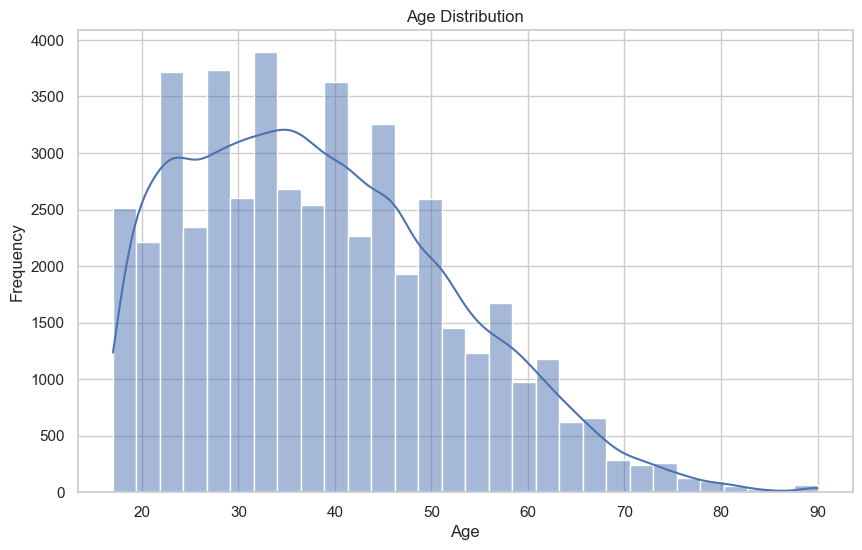

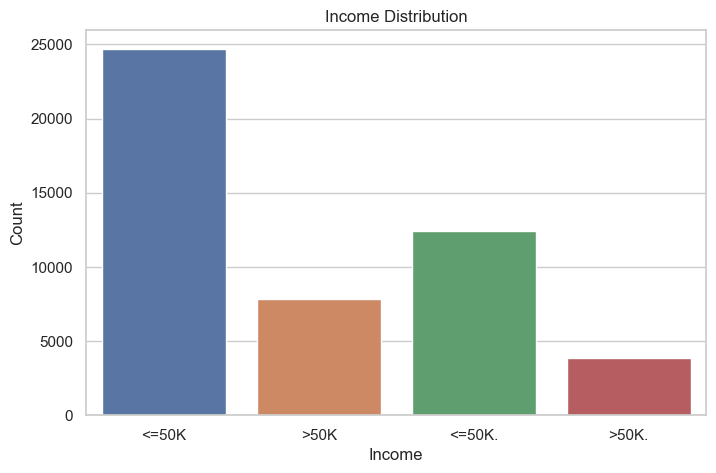

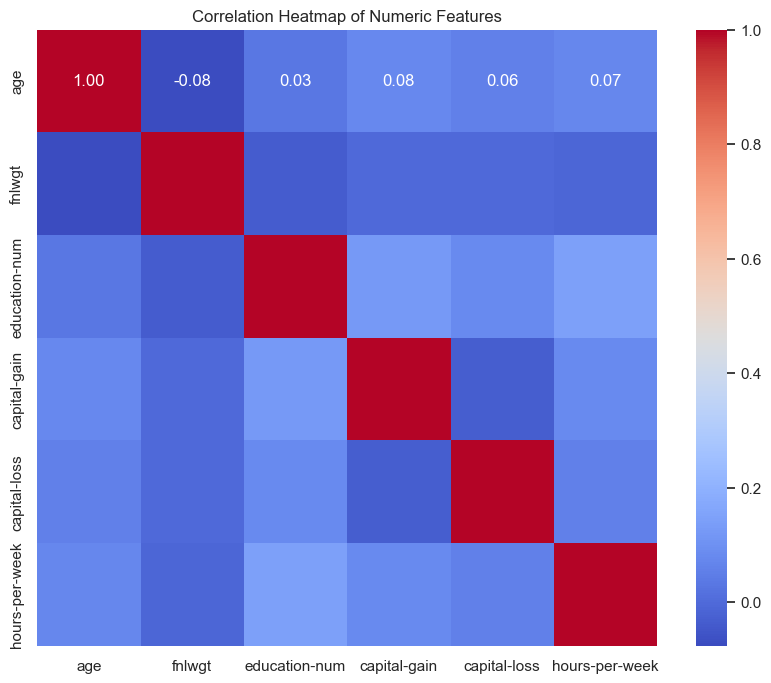

In [96]:
# Block 6: Missing Value Analysis
# Fehlende Werte analysieren
missing_values = adult_data.isnull().sum()  # Count missing values for each column in the DataFrame
missing_percentage = (missing_values / len(adult_data)) * 100  # Calculate percentage of missing values for each column

print("\nMissing Values Percentage:\n", missing_percentage)  # Print the percentage of missing values for each column


c:\Users\Soner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


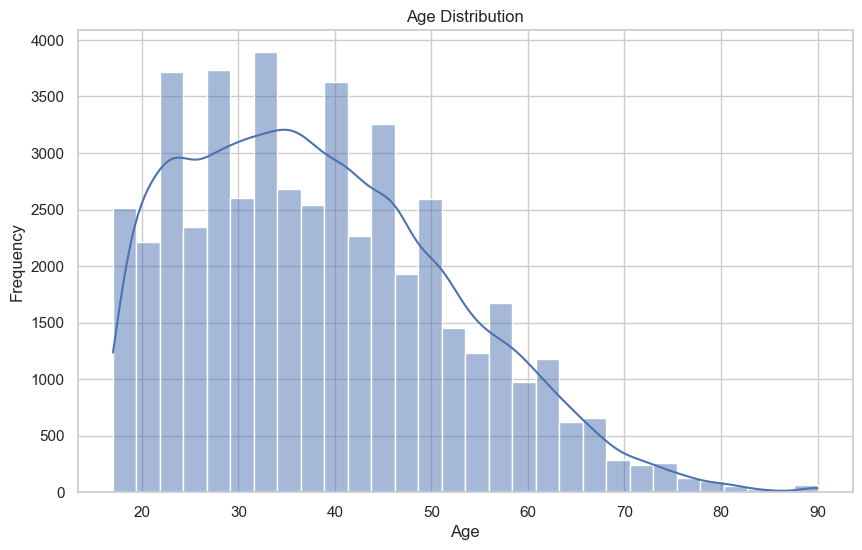

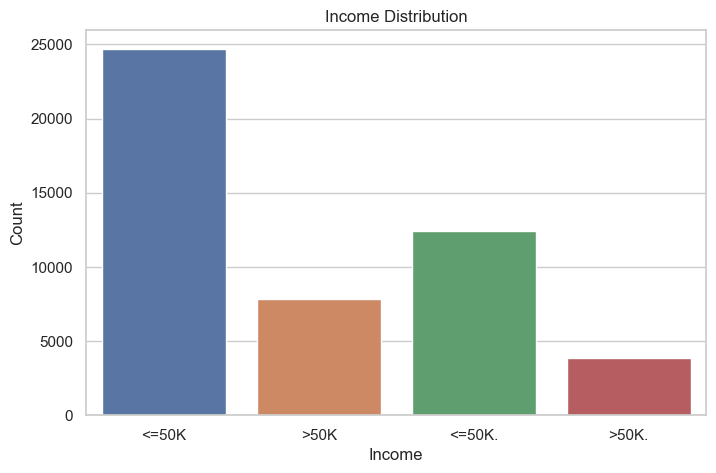

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

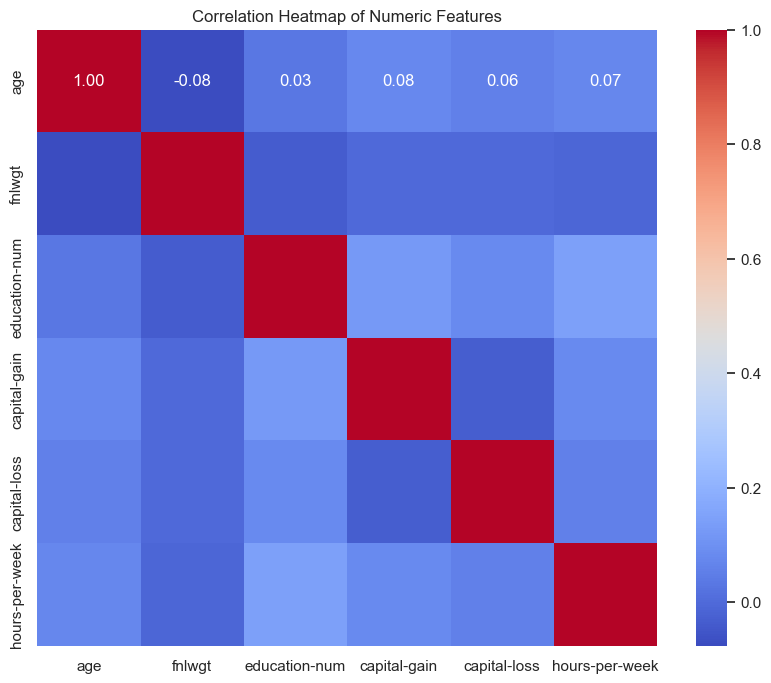

In [ ]:
# Block 7: Data Visualization 
# Datenvisualisierung 
plt.figure(figsize=(10, 6))  
sns.histplot(adult_data['age'], bins=30, kde=True)  
plt.title('Age Distribution')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.show()  

plt.figure(figsize=(8, 5))  
sns.countplot(x='income', data=adult_data)  
plt.title('Income Distribution')  
plt.xlabel('Income')  
plt.ylabel('Count')  
plt.show()  

plt.figure(figsize=(10, 8))  
correlation = adult_data.select_dtypes(include=[np.number]).corr()  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Heatmap of Numeric Features')  
plt.show()  


In [ ]:
# Block 8: Feature Engineering and Model Training 
# Merkmalsengineering und Modelltraining (Machine Learning)
le = LabelEncoder() 
for column in X.select_dtypes(include=['object']).columns:  
    X.loc[:, column] = le.fit_transform(X[column].astype(str))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

rf = RandomForestClassifier(n_estimators=100)  
rf.fit(X_train, y_train)  

y_pred = rf.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
print(f"Random Forest Accuracy: {accuracy:.2f}")  
print("\nClassification Report:\n", classification_report(y_test, y_pred))  

importances = rf.feature_importances_  
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)  

plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)  
plt.title('Feature Importance in Random Forest Model')  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.show() 


In our code, we used several important libraries to help us analyze the Adult Income dataset. 

1. **Pandas**: This library is used in all blocks (1 to 8) for data manipulation and analysis. It helps us read the dataset, clean the data, and combine features with the target variable.

2. **NumPy**: We use NumPy in Block 7 to perform numerical operations, especially when calculating correlations between numeric features.

3. **Matplotlib**: This library is used in Blocks 7 and 8 for creating visualizations. It helps us plot histograms, count plots, and feature importance graphs to understand the data better.

4. **Seaborn**: Seaborn is also used in Blocks 7 and 8 for enhanced data visualization. It provides beautiful and informative statistical graphics, making it easier to visualize distributions and correlations.

5. **Scikit-learn**: This library is used in Blocks 6, 7, and 8 for machine learning tasks. We use it to split the dataset into training and testing sets, encode categorical variables, and create a Random Forest model for predictions.

6. **UCI ML Repo**: In Block 2, we use this library to fetch the Adult Income dataset directly from the UCI Machine Learning Repository. It simplifies data acquisition without needing to download files manually.


In unserem Code haben wir mehrere wichtige Bibliotheken verwendet, um das Adult Income-Dataset zu analysieren.

1. **Pandas**: Diese Bibliothek wird in allen Blöcken (1 bis 8) für die Datenmanipulation und -analyse verwendet. Sie hilft uns, das Dataset zu lesen, die Daten zu bereinigen und Merkmale mit der Zielvariable zu kombinieren.

2. **NumPy**: Wir verwenden NumPy in Block 7 für numerische Berechnungen, insbesondere beim Berechnen von Korrelationen zwischen numerischen Merkmalen.

3. **Matplotlib**: Diese Bibliothek wird in den Blöcken 7 und 8 zum Erstellen von Visualisierungen verwendet. Sie hilft uns, Histogramme, Zähl-Diagramme und Diagramme zur Merkmalswichtigkeit zu zeichnen, um die Daten besser zu verstehen.

4. **Seaborn**: Seaborn wird ebenfalls in den Blöcken 7 und 8 für verbesserte Datenvisualisierung verwendet. Es bietet schöne und informative statistische Grafiken, die es einfacher machen, Verteilungen und Korrelationen zu visualisieren.

5. **Scikit-learn**: Diese Bibliothek wird in den Blöcken 6, 7 und 8 für maschinelles Lernen verwendet. Wir nutzen sie, um das Dataset in Trainings- und Testdatensätze aufzuteilen, kategoriale Variablen zu kodieren und ein Random Forest-Modell für Vorhersagen zu erstellen.

6. **UCI ML Repo**: In Block 2 verwenden wir diese Bibliothek, um das Adult Income-Dataset direkt aus dem UCI Machine Learning Repository abzurufen. Sie vereinfacht die Datenerfassung, ohne dass Dateien manuell heruntergeladen werden müssen.


### Documentation

In my analysis of the Adult Income dataset, I encountered some challenges, particularly when it came to understanding and generating a correlation heatmap using the data. Despite watching various YouTube videos and utilizing AI tools for guidance, I found it difficult to grasp the concept fully and implement it correctly in my code. This was especially true in **Block 7**, where I aimed to visualize the relationships between numeric features through a heatmap.

However, I was able to successfully create simpler plots, such as linear diagrams and histograms, without any issues. The use of libraries like Matplotlib and Seaborn in **Block 7** allowed me to generate clear visualizations of age distribution and income categories effectively. 

Overall, while I faced some hurdles with the heatmap, the combination of AI assistance and my own efforts helped me navigate through the complexities of data visualization. I appreciate the support provided by AI tools in enhancing my understanding and execution of these tasks.

- soneruen

### Dokumentation

In meiner Analyse des Adult Income-Datasets stieß ich auf einige Herausforderungen, insbesondere beim Verständnis und der Erstellung einer Korrelationsheatmap mit den Daten. Trotz des Ansehens verschiedener YouTube-Videos und der Nutzung von KI-Tools zur Unterstützung fand ich es schwierig, das Konzept vollständig zu erfassen und korrekt in meinem Code umzusetzen. Dies galt insbesondere für **Block 7**, in dem ich die Beziehungen zwischen numerischen Merkmalen durch eine Heatmap visualisieren wollte.

Dennoch konnte ich erfolgreich einfachere Diagramme, wie z.B. lineare Diagramme und Histogramme, ohne Probleme erstellen. Die Verwendung von Bibliotheken wie Matplotlib und Seaborn in **Block 7** ermöglichte es mir, klare Visualisierungen der Altersverteilung und der Einkommenskategorien effektiv zu generieren.

Insgesamt, obwohl ich bei der Heatmap auf einige Hürden stieß, half mir die Kombination aus KI-Unterstützung und meinen eigenen Bemühungen, die Komplexität der Datenvisualisierung zu bewältigen. Ich schätze die Unterstützung durch KI-Tools zur Verbesserung meines Verständnisses und meiner Umsetzung dieser Aufgaben.

- soneruen